## Diabetes predictions

In [1]:
from sklearn.datasets import load_diabetes

In [5]:
dataset = load_diabetes()

print(dataset.keys())

print(dataset['DESCR'])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log 

In [6]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [8]:
import pandas as pd

df = pd.DataFrame(dataset['data'], columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
X=df
y=dataset['target']



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [12]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


<Axes: >

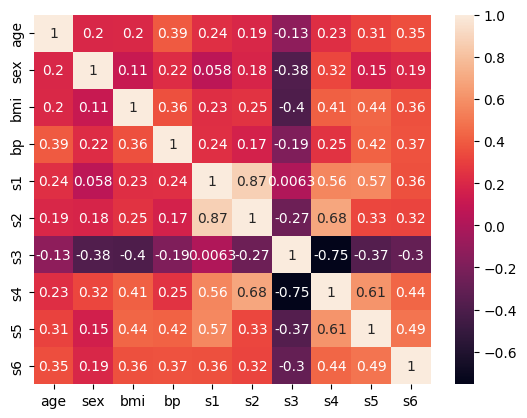

In [15]:
import seaborn as sns

sns.heatmap(X_train.corr(), annot=True)

In [16]:
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor()

In [17]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Hyper paramater tuning

In [18]:
params={

    'max_depth': [2,3,4,5,6,7,8,9,10],
    'splitter' : ['best', 'random'],
    'criterion' : ['mse', 'friedman_mse', 'mae'],
    'max_features' : ['auto', 'sqrt', 'log2'] 
}

In [23]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

grid = GridSearchCV(regressor, param_grid=params, cv=5,scoring='neg_mean_squared_error')


In [24]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [26]:
y_pred = grid.predict(X_test)

In [27]:
y_pred

array([110.94936709, 196.75      , 158.92361111,  81.25      ,
       110.94936709,  53.5       , 158.92361111, 266.        ,
       110.94936709, 110.94936709, 110.94936709, 158.92361111,
       158.92361111, 110.94936709,  53.5       , 251.85714286,
       110.94936709, 110.94936709, 196.75      , 110.94936709,
       158.92361111, 266.        ,  83.33333333, 224.9       ,
       200.5       , 158.92361111, 158.92361111, 158.92361111,
       158.92361111, 110.94936709, 266.        , 266.        ,
       110.94936709, 158.92361111, 158.92361111, 158.92361111,
       111.69230769, 196.75      , 251.85714286, 158.92361111,
       158.92361111, 110.94936709, 196.75      , 110.94936709,
       111.69230769, 200.5       , 110.94936709, 110.94936709,
       266.        , 110.94936709, 158.92361111, 110.94936709,
       110.94936709, 266.        , 224.9       ,  81.25      ,
       110.94936709, 158.92361111, 158.92361111, 158.92361111,
       158.92361111, 110.94936709, 110.94936709, 111.69

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))



4783.939683350575
0.2439651790518227
55.460894398501466


In [30]:
regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, max_features='sqrt', splitter='random')

In [31]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='sqrt', splitter='random')

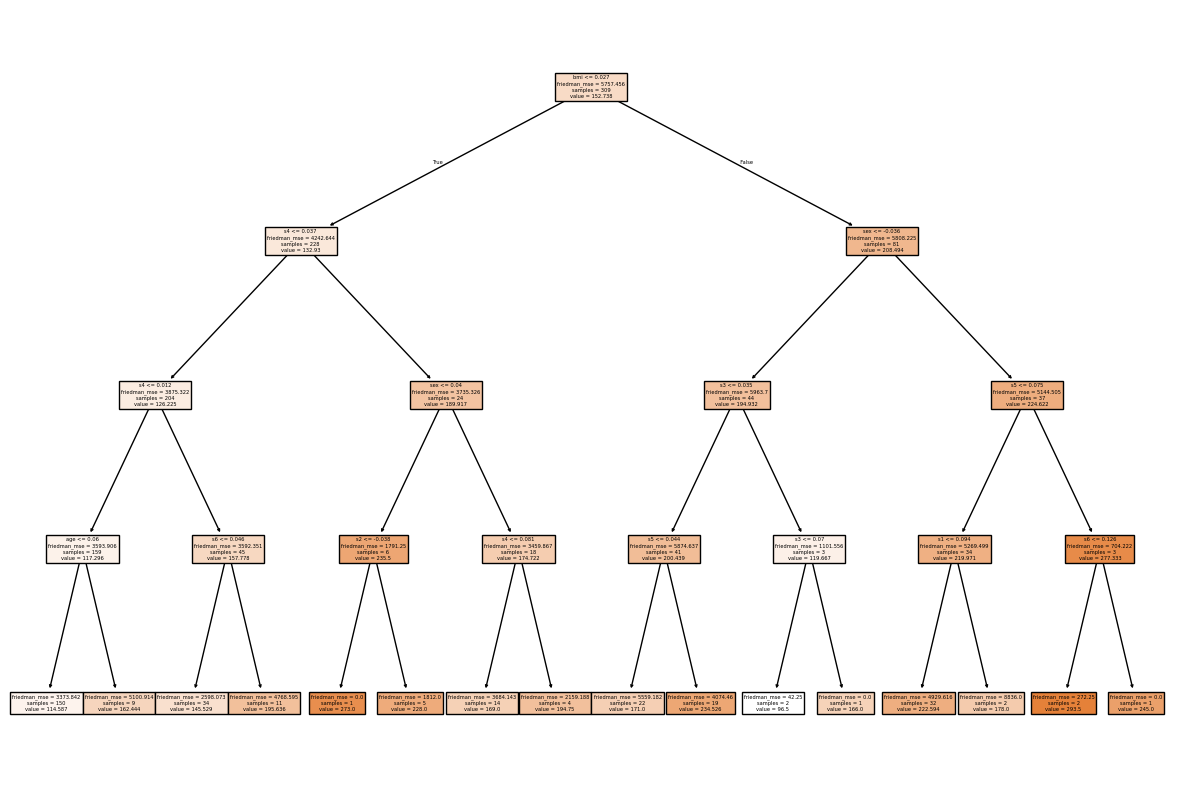

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(regressor,filled=True,feature_names=X.columns)
plt.show()